In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn import preprocessing

rd = pd.read_csv("river_data.csv")
rs = pd.read_csv("river_stations.csv")
wd = pd.read_csv("weather_data.csv")
ws = pd.read_csv("weather_stations.csv")
station_no_river_dusseldorf = "6335050"
station_no_river_cologne = "6335060"
station_no_weather_sollingen = "4741"
station_no_weather_cologne = "2968"

#saving the data size
rd_m, rd_n = rd.shape
rs_m, rs_n = rs.shape
wd_m, wd_n = wd.shape
ws_m, ws_n = ws.shape


# Read River Data

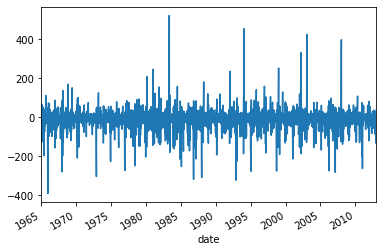

In [2]:
rd_c = pd.read_csv('stations/station_' + station_no_river_cologne + '_river_data.csv')
rd_c.date = pd.to_datetime(rd_c.date, format='%Y-%m-%d')
rd_c = rd_c.set_index('date')

rd_c.delta1.plot()

Checking the Correlation between water level and discharge at cologne

In [3]:
corrcoef_water_discharge_cologne = np.corrcoef(rd_c['water_level'], rd_c['discharge'])

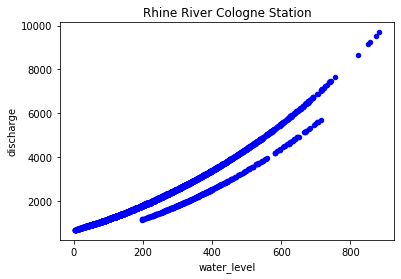

In [4]:
rd_c[1:5000].plot(kind='scatter', x='water_level', y='discharge', color='blue')
plt.title("Rhine River Cologne Station")
plt.show()

# Read the Weather Data

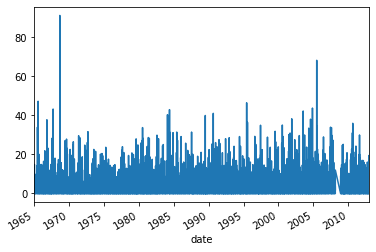

In [44]:
wd_c = pd.read_csv('weather_stations/station_' + station_no_weather_cologne + '_weather_data.csv')
wd_c.date = pd.to_datetime(wd_c.date, format='%Y-%m-%d')
wd_c = wd_c.set_index('date')

wd_r = pd.read_csv('weather_stations/station_' + station_no_weather_sollingen + '_weather_data.csv')
wd_r.date = pd.to_datetime(wd_r.date, format='%Y-%m-%d')
wd_r = wd_r.set_index('date')



wd_c.RS.plot()

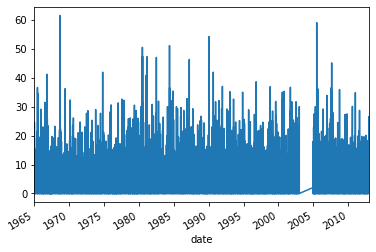

In [45]:
wd_r.RS.plot()

In [46]:
combine_df_cr = pd.merge(wd_c, wd_r, how='inner', on=['date'])

In [47]:
combine_df_cr

,STATIONS_ID_x,RS_x,RSF_x,SH_TAG_x,NSH_TAG_x,year_x,month_x,STATIONS_ID_y,RS_y,RSF_y,SH_TAG_y,NSH_TAG_y,year_y,month_y
date,,,,,,,,,,,,,,
1965-01-01,2968,1.2,1.0,0.0,0.0,1965,1,4741,0.5,1.0,0.0,0.0,1965,1
1965-01-02,2968,0.3,1.0,0.0,0.0,1965,1,4741,0.7,1.0,0.0,0.0,1965,1
1965-01-03,2968,0.1,1.0,0.0,0.0,1965,1,4741,0.9,1.0,0.0,0.0,1965,1
1965-01-04,2968,0.0,7.0,0.0,0.0,1965,1,4741,0.0,0.0,0.0,0.0,1965,1
1965-01-05,2968,1.2,1.0,0.0,0.0,1965,1,4741,3.5,8.0,0.0,0.0,1965,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,2968,10.7,4.0,NaN,NaN,2012,12,4741,14.4,4.0,0.0,0.0,2012,12
2012-12-28,2968,1.3,4.0,NaN,NaN,2012,12,4741,2.0,4.0,0.0,0.0,2012,12
2012-12-29,2968,0.1,4.0,NaN,NaN,2012,12,4741,1.3,4.0,0.0,0.0,2012,12


In [48]:
#np.nan_to_num(combine_df_cr, nan=0)
#a = corrcoef_water_discharge_cologne = np.corrcoef(combine_df_cr['RS_x'], combine_df_cr['RS_y'])
a = combine_df_cr[['RS_x', 'RS_y']].corr()
a

,RS_x,RS_y
RS_x,1.00000,0.82459
RS_y,0.82459,1.00000


Combine the weather and river data at cologne

In [49]:
combine_df_c = pd.merge(rd_c, wd_c, how='left', on=['date'])
#combine_df_c.to_csv(f'./cologne_combined_data.csv')

In [50]:
#combine_df_c[1090:1100]

Adjust the combined data

In [51]:
columns = ['year_y', 'month_y','station_no', 'STATIONS_ID', 'year_x', 'month_x','RSF', 'SH_TAG', 'NSH_TAG']
combine_df_c.drop(columns, inplace=True, axis=1)


In [52]:
combine_df_c[1090:1100]


,discharge,water_level,delta1,delta2,delta3,RS
date,,,,,,
1968-06-20,2200.0,252.0,16.0,19.0,11.0,3.8
1968-06-21,2150.0,245.0,7.0,23.0,26.0,17.4
1968-06-22,2160.0,247.0,-2.0,5.0,21.0,0.0
1968-06-23,2170.0,248.0,-1.0,-3.0,4.0,7.5
1968-06-24,2170.0,248.0,0.0,-1.0,-3.0,1.4
1968-06-25,2270.0,262.0,-14.0,-14.0,-15.0,6.5
1968-07-12,1900.0,211.0,51.0,37.0,37.0,0.0
1968-07-13,1920.0,213.0,-2.0,49.0,35.0,8.9
1968-07-14,1930.0,205.0,8.0,6.0,57.0,7.0


Normalize X

save the combined data

In [53]:
#combine_df_c.to_csv(f'./cologne_combined_data.csv')

In [54]:
def define_X_y(df, pred_start, prev_X, prev_y):
    head_df = df[df.index < pred_start]
    #head_df.drop(['station_no', 'STATIONS_ID', 'year_x', 'month_x','RSF', 'SH_TAG', 'NSH_TAG'], axis=1, inplace=True)
    head_df['RS_y'] = head_df.RS.shift(1)
    #head_df['RS_t'] = head_df.RS.shift(-1)
    #print(head_df)
    
    X = head_df
    y1 = head_df.water_level.shift(-1)
    y2 = head_df.water_level.shift(-2)
    y3 = head_df.water_level.shift(-3)
    X = np.nan_to_num(X, nan=0)
    X_normalized = X#preprocessing.normalize(X, norm='l2')
    X_last = X_normalized[-1,:]
    X = X[:-3]
    y1 = y1[:-3]
    y2 = y2[:-3]
    y3 = y3[:-3]
    if prev_X.shape[0] > 3:
        X_normalized = np.concatenate((prev_X, X_normalized))
        y1 = np.concatenate((prev_y[:,0], y1))
        y2 = np.concatenate((prev_y[:,1], y2))
        y3 = np.concatenate((prev_y[:,2], y3))
    return X_normalized, X_last, y1, y2, y3

In [55]:
def train_the_model(X,y1,y2,y3):
    X_train, X_test, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=0)
    regressor1 = LinearRegression()  
    regressor1.fit(X_train, y_train1) #training the algorithm

    y_pred1 = regressor1.predict(X_test)
    y_pred1 = np.diff(y_pred1)
    y_test1 = np.diff(y_test1)

    X_train, X_test, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=5)
    regressor2 = LinearRegression()  
    regressor2.fit(X_train, y_train1) #training the algorithm

    y_pred2 = regressor2.predict(X_test)
    y_pred2 = np.diff(y_pred2)
    y_test2 = np.diff(y_test2)

    X_train, X_test, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=2)
    regressor3 = LinearRegression()  
    regressor3.fit(X_train, y_train3) #training the algorithm

    y_pred3 = regressor3.predict(X_test)
    y_pred3 = np.diff(y_pred3)
    y_test3 = np.diff(y_test3)

    y_true = np.concatenate((y_test1, y_test2, y_test3), axis=None)
    y_pred = np.concatenate((y_pred1, y_pred2, y_pred3), axis=None)
    
    return y_true, y_pred

In [56]:
skip_missing_days = 16
full_range = pd.date_range(combine_df_c.index.min(), combine_df_c.index.max()+pd.Timedelta(days=1)) #TODO add last day!
combine_df_c = combine_df_c.reindex(full_range, fill_value=np.NaN)

next_gap = pd.to_datetime(combine_df_c.water_level.isnull().idxmax())
tail_gap = next_gap + pd.Timedelta(days=skip_missing_days)
prev_X = pd.DataFrame(np.zeros([1, 9])*0)
prev_y = pd.DataFrame(np.zeros([1, 3])*0)
r2_results = np.zeros(1)
X_real_test = np.zeros([1,np.shape[]] )

In [57]:
while next_gap:
    X, X_last, y1, y2, y3 = define_X_y(combine_df_c, next_gap, prev_X, prev_y)
    X_real_test = []
    X = np.nan_to_num(X, nan=0)
    indexNames = combine_df_c[ combine_df_c.index < tail_gap ].index
    combine_df_c.drop(indexNames , inplace=True)
    y1 = np.nan_to_num(y1, nan=0)
    y2 = np.nan_to_num(y2, nan=0)
    y3 = np.nan_to_num(y3, nan=0)
    y_true, y_pred = train_the_model(X,y1,y2,y3)
    r2_score(y_true, y_pred)
    if np.shape(combine_df_c)[0] < 2:
        break
    next_gap = pd.to_datetime(combine_df_c.water_level.isnull().idxmax())
    tail_gap = next_gap + pd.Timedelta(days=skip_missing_days)
    prev_X = X
    prev_y = [y1, y2, y3]
    prev_y = np.transpose(prev_y)
        #combine_df_c[next_gap < combine_df_c.index & tail_gap > combine_df_c.index]

/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/recepcanadiguzel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [58]:
X.shape
#df = pd.DataFrame({'Actual1': y_test1.flatten(), 'Predicted1': y_pred1.flatten(), 'Actual2': y_test2.flatten(),
#                   'Predicted2': y_pred2.flatten(), 'Actual3': y_test3.flatten(), 'Predicted3': y_pred3.flatten()})
#df 


(14394, 7)

# Calculate R2 Score

In [59]:
r2_score(y_true, y_pred)

0.6308893850630801

In [39]:
print(np.shape(prev_X))
print(np.shape(prev_y))
print(np.shape(X))
print(np.shape(y1))
print(np.shape(y_true))
print(np.shape(y_pred))

(14371, 7)
(14371, 3)
(14394, 7)
(14394,)
(8634,)
(8634,)


In [42]:
y_true

array([  87.,   88., -156., ...,   15.,   12.,  165.])

In [43]:
y_pred

array([112.13570615, -51.35247108,   6.12734283, ...,   3.88557907,
        71.22754463, -59.31636549])

In [60]:
X

array([[ 1.240000e+03,  1.100000e+02,  0.000000e+00, ...,  0.000000e+00,
         1.200000e+00,  0.000000e+00],
       [ 1.680000e+03,  1.780000e+02, -6.800000e+01, ...,  0.000000e+00,
         3.000000e-01,  1.200000e+00],
       [ 1.820000e+03,  2.000000e+02, -2.200000e+01, ...,  0.000000e+00,
         1.000000e-01,  3.000000e-01],
       ...,
       [ 5.973463e+03,  7.490000e+02,  1.200000e+01, ..., -9.400000e+01,
         8.200000e+00,  3.400000e+00],
       [ 5.856063e+03,  7.390000e+02,  1.000000e+01, ..., -5.000000e+00,
         1.070000e+01,  8.200000e+00],
       [ 5.993476e+03,  7.510000e+02, -1.200000e+01, ...,  1.000000e+01,
         1.300000e+00,  1.070000e+01]])

In [62]:
y_true

array([  87.,   88., -156., ...,   15.,   12.,  165.])

In [63]:
X_true

NameError: name 'X_true' is not defined

In [64]:
X

array([[ 1.240000e+03,  1.100000e+02,  0.000000e+00, ...,  0.000000e+00,
         1.200000e+00,  0.000000e+00],
       [ 1.680000e+03,  1.780000e+02, -6.800000e+01, ...,  0.000000e+00,
         3.000000e-01,  1.200000e+00],
       [ 1.820000e+03,  2.000000e+02, -2.200000e+01, ...,  0.000000e+00,
         1.000000e-01,  3.000000e-01],
       ...,
       [ 5.973463e+03,  7.490000e+02,  1.200000e+01, ..., -9.400000e+01,
         8.200000e+00,  3.400000e+00],
       [ 5.856063e+03,  7.390000e+02,  1.000000e+01, ..., -5.000000e+00,
         1.070000e+01,  8.200000e+00],
       [ 5.993476e+03,  7.510000e+02, -1.200000e+01, ...,  1.000000e+01,
         1.300000e+00,  1.070000e+01]])

In [73]:
[X, np.ones([1,7])]

[array([[ 1.240000e+03,  1.100000e+02,  0.000000e+00, ...,  0.000000e+00,
          1.200000e+00,  0.000000e+00],
        [ 1.680000e+03,  1.780000e+02, -6.800000e+01, ...,  0.000000e+00,
          3.000000e-01,  1.200000e+00],
        [ 1.820000e+03,  2.000000e+02, -2.200000e+01, ...,  0.000000e+00,
          1.000000e-01,  3.000000e-01],
        ...,
        [ 5.973463e+03,  7.490000e+02,  1.200000e+01, ..., -9.400000e+01,
          8.200000e+00,  3.400000e+00],
        [ 5.856063e+03,  7.390000e+02,  1.000000e+01, ..., -5.000000e+00,
          1.070000e+01,  8.200000e+00],
        [ 5.993476e+03,  7.510000e+02, -1.200000e+01, ...,  1.000000e+01,
          1.300000e+00,  1.070000e+01]]),
 array([[1., 1., 1., 1., 1., 1., 1.]])]